In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

In [16]:
pprint([i for i in dir(cv2) if i.startswith('COLOR_')])

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

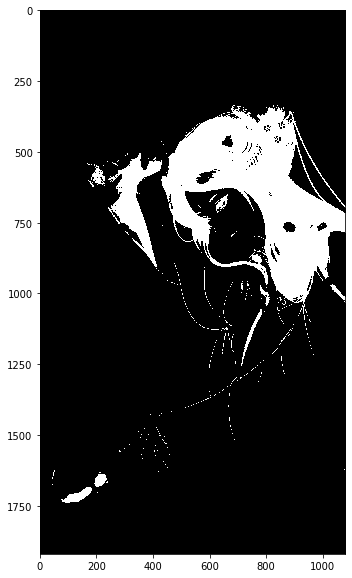

In [17]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img = cv2.threshold(img, thresh=150, maxval=255, type=cv2.THRESH_BINARY_INV)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img, cmap='gray')
plt.show()

形态学操作是根据图像形状进行的简单操作。一般情况下是对二值化（整张图像只有两种像素值：0和1，像素值为0时表示黑色，像素值为1时表示白色）图像进行的操作，需要输入两个参数，一个是原始图像，一个是被称为结构化元素或核，它用来决定操作的性质。两个基本的形态学操作是：腐蚀和膨胀。

#### 腐蚀：
卷积核沿着图像像素滑动，如果与卷积核对应的原图像的所有像素值都是1，那么中心元素就保持原来的像素值，否则就变为0.这样做产生的影响是：根据卷积核的大小，靠近前景（像素值为1）的所有像素都会被腐蚀掉（变为0），前景物体会变小，整幅图像的白色区域会减少。这对去除白噪声很有用，也可以用来断开两个连在一块的物体。

#### cv2.erode(src,kernel, src [, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

+ src：输入图像
+ kernel:kernel指腐蚀操作的内核，默认是一个简单的3X3矩阵，我们也可以利用getStructuringElement（）函数指明它的形状
+ iterations: 腐蚀次数

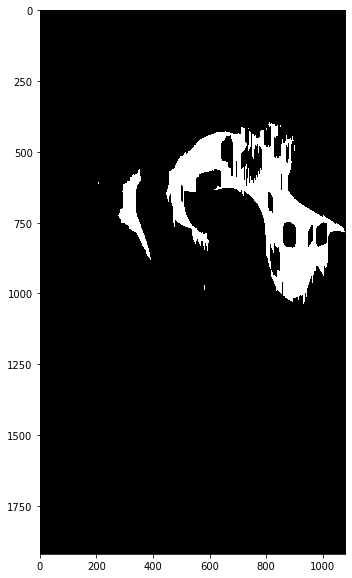

In [18]:
img_erode = cv2.erode(src=img, kernel=(5, 5), iterations=55)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_erode, cmap='gray')
plt.show()